In [1]:
import pandas as pd
import datetime 
from matplotlib import pyplot as plt
import numpy as np

In [2]:
stock=pd.read_csv('meta.us.txt')
stock.columns=['TICKER','PER','DATE','TIME','OPE<N','HIGH','LOW','CLOSE','VOL','OPENINT']
stock.head()


,TICKER,PER,DATE,TIME,OPE<N,HIGH,LOW,CLOSE,VOL,OPENINT
0,META.US,60,20211230,160000,344.00,345.700,343.22,345.275,1227974,0
1,META.US,60,20211230,170000,345.29,346.570,344.75,344.750,1365663,0
2,META.US,60,20211230,180000,344.80,345.383,344.17,345.366,755072,0
3,META.US,60,20211230,190000,345.37,345.900,345.13,345.493,544627,0
4,META.US,60,20211230,200000,345.49,346.696,345.28,346.535,565582,0


In [3]:
stock['TIME']  = pd.to_datetime(stock['TIME'],format= '%H%M%S' ).dt.time
stock['DATE'] = pd.to_datetime(
                          stock['DATE'],
                          format='%Y%m%d').dt.date

In [4]:

stock['Date-time'] = pd.to_datetime(stock.DATE.astype(str) + ' ' + stock.TIME.astype(str))
stock['Date-time']
stock.head()

,TICKER,PER,DATE,TIME,OPE<N,HIGH,LOW,CLOSE,VOL,OPENINT,Date-time
0,META.US,60,2021-12-30,16:00:00,344.00,345.700,343.22,345.275,1227974,0,2021-12-30 16:00:00
1,META.US,60,2021-12-30,17:00:00,345.29,346.570,344.75,344.750,1365663,0,2021-12-30 17:00:00
2,META.US,60,2021-12-30,18:00:00,344.80,345.383,344.17,345.366,755072,0,2021-12-30 18:00:00
3,META.US,60,2021-12-30,19:00:00,345.37,345.900,345.13,345.493,544627,0,2021-12-30 19:00:00
4,META.US,60,2021-12-30,20:00:00,345.49,346.696,345.28,346.535,565582,0,2021-12-30 20:00:00


In [5]:
test_ratio = 0.2
training_ratio = 1 - test_ratio

train_size = int(training_ratio * len(stock))
test_size = int(test_ratio * len(stock))
train = stock[:train_size][['Date-time', 'CLOSE']]
test = stock[train_size:][['Date-time', 'CLOSE']]
target=stock['CLOSE']




RMSE: 13.70
MAPE: 8.79%


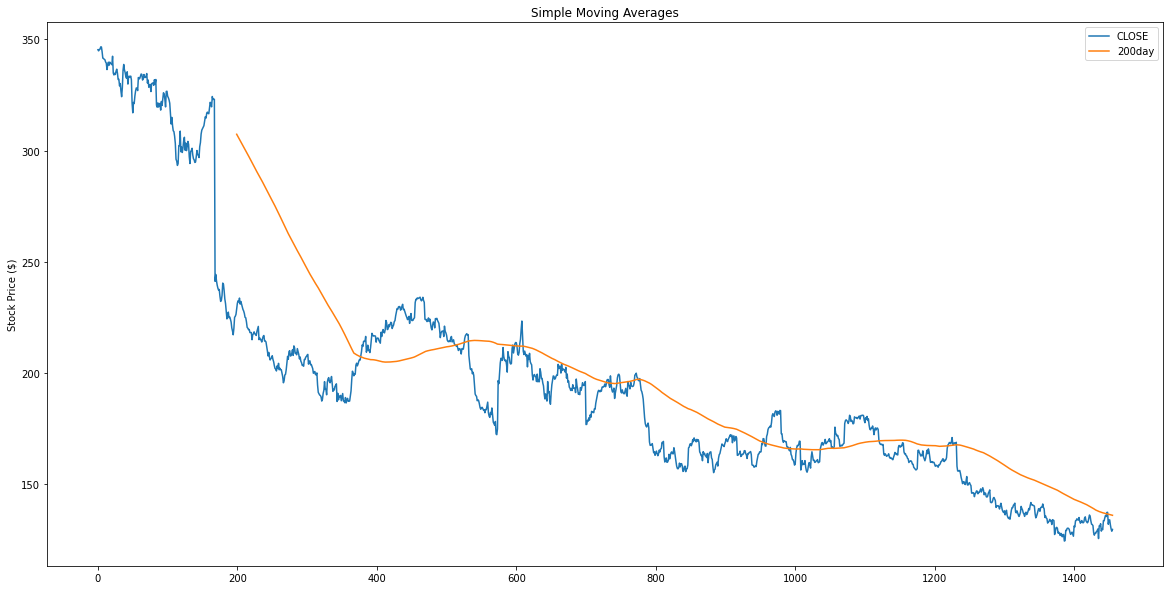

In [6]:
lag = 200

def plot_stock_trend(var, cur_title, stock=stock,logmodelName='Simple MA'):
    ax = stock[['CLOSE',var]].plot(figsize=(20, 10))
    plt.grid(False)
    plt.title(cur_title)
    plt.axis('tight')
    plt.ylabel('Stock Price ($)')
 
def calculate_rmse(y_true, y_pred):
    """
    Calculate the Root Mean Squared Error (RMSE)  
    """
    rmse = np.sqrt(np.mean((y_true-y_pred)**2))                   
    return rmse

def calculate_mape(y_true, y_pred): 
    """
    Calculate the Mean Absolute Percentage Error (MAPE) %
    """
    y_pred, y_true = np.array(y_pred), np.array(y_true)    
    mape = np.mean(np.abs((y_true-y_pred) / y_true))*100    
    return mape
def calculate_perf_metrics(var,logmodelName='Simple MA'):
    ### RMSE 
    rmse = calculate_rmse(np.array(stock[train_size:]['CLOSE']), np.array(stock[train_size:][var]))
    ### MAPE 
    mape = calculate_mape(np.array(stock[train_size:]['CLOSE']), np.array(stock[train_size:][var]))
     
    return rmse, mape

lag_day = str(lag) + 'day'
    
stock[lag_day] = stock['CLOSE'].rolling(lag).mean()

    
### Plot and performance metrics for SMA model
plot_stock_trend(lag_day, cur_title='Simple Moving Averages', logmodelName='Simple MA')

rmse_sma, mape_sma = calculate_perf_metrics(var=lag_day,logmodelName='Simple MA')
rmse_sma
print("RMSE:", '{0:.2f}'.format(rmse_sma))
print("MAPE:",'{0:.2f}%'.format(mape_sma))
